[View in Colaboratory](https://colab.research.google.com/github/Kichkun/smart_chair/blob/master/Data_Analysis/D.ipynb)

# Introduction to Data Science 


---

## Final project: Data analysis for SMART CHAIR devise


---

Team:

1.   A. Kishkun
2.   O.Rusanova
2.   R. Shaniiazov




##SMART CHAIR*
### Project description

Today IoT is wildly used technology. There are smart house, smart offices, smart watch and such devises become a normal for our everyday life. 
Smart chair can be very good example of convenient IoT technology. It can be used in HR offices for stress resisting detection, in cybersport for understanding reaction, in clinical departments for detection physiological and psychological behavior.  
During the IoT project prototype of Smart Chair was been developed.
It consist of:


1.   Simple office chair 
2.   Raspberry Pi
1.   Accelerometer 
2.   Magnetometer



 ![CAD model of the
enclosure](https://raw.github.com/Kichkun/smart_chair/master/Data_Analysis/pic/SC3.jpg =300x200 "foo")

Data from sensor was collected and was used for people behavior estimation.




---


*The problem for Introduction to Data science project come as part of the  project for Introduction to Internet of Things (IoT) course. 

### Problem statement
Using the machine learning for people stress level classification with using data from accelerometer and magnetometer.

### Problem statement definition
Existing technology for stress level detection use contact approach for measurement, what, obviously, not the best solution for independent investigation. The using of ML can provide contactless approach for solving this kind of tasks. It will allow increasing quality of such investigation, and devises with that technology can be use in banks, restaurants, offices and hospitals etc.
#### Prototype
![alt text](https://raw.github.com/Kichkun/smart_chair/master/Data_Analysis/pic/SC4.jpg =300x200 "foo")

### Data collection 
Data collection is one of the main problem we faced. 

  1)Hardware problem: everytime something happened with hardware


*  Power was broken 
*  Power connection was poor
*  The smart chair was disassembled after fast movement 


![SC](https://raw.github.com/Kichkun/smart_chair/master/Data_Analysis/pic/SC2.jpg =200x200 "foo")









 2) Orginazation of  stress conditions  for test persons was challenging
 
*   scary video demonstation *
*   talking about DS course deadlines 


3) Safety of Smart Chair devise: there are not many chairs in Masterskay


![SC](https://raw.github.com/Kichkun/smart_chair/master/Data_Analysis/pic/SC1.jpg =200x200 "foo")

---

*videos are attached

In [0]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.patches import Ellipse

## Loading the data

In [0]:
df_acc_0 = pd.read_csv('https://raw.github.com/Kichkun/smart_chair/master/Data_Analysis/data/accelerometer.csv')
df_acc_1 = pd.read_csv('https://raw.github.com/Kichkun/smart_chair/master/Data_Analysis/data/accelerometer1.csv')
df_acc_2 = pd.read_csv('https://raw.github.com/Kichkun/smart_chair/master/Data_Analysis/data/accelerometer2.csv')
df_acc_3 = pd.read_csv('https://raw.github.com/Kichkun/smart_chair/master/Data_Analysis/data/accelerometer3.csv')

df_mag_0 = pd.read_csv('https://raw.github.com/Kichkun/smart_chair/master/Data_Analysis/data/magnetometer.csv')
df_mag_1 = pd.read_csv('https://raw.github.com/Kichkun/smart_chair/master/Data_Analysis/data/magnetometer1.csv')
df_mag_2 = pd.read_csv('https://raw.github.com/Kichkun/smart_chair/master/Data_Analysis/data/magnetometer2.csv')
df_mag_3 = pd.read_csv('https://raw.github.com/Kichkun/smart_chair/master/Data_Analysis/data/magnetometer3.csv')

df_0 = df_mag_0.join(df_acc_0[['ax', 'ay', 'az']])
df_1 = df_mag_1.join(df_acc_1[['ax', 'ay', 'az']])
df_2 = df_mag_2.join(df_acc_2[['ax', 'ay', 'az']])
df_3 = df_mag_3.join(df_acc_3[['ax', 'ay', 'az']])


## Dataset preparation

### Dropping useless columns and columns renaming

In [0]:
columns2drop = ['meta_info', 'type_sensor','id','date_created']

rename_dict = {
    'x': 'Mag_x',
    'y': 'Mag_y',
    'z': 'Mag_z',
    'ax': 'Acc_x',
    'ay': 'Acc_y',
    'az': 'Acc_z',
}

In [0]:
for df in [df_0, df_1, df_2,df_3]:
    df.drop(columns2drop, axis=1, inplace=True, errors='ignore')
    df.rename(columns=rename_dict, inplace=True)

### Making the full dataset

In [0]:
data = df_0.append(df_1)
data=data.append(df_2)
data=data.append(df_3)

In [7]:
data.head()

,label,people_id,Mag_x,Mag_y,Mag_z,Acc_x,Acc_y,Acc_z
0,MagLaBeL,peopleID,1288,-4376,5602,0,1568,0
1,MagLaBeL,peopleID,1246,-4383,5629,5056,704,16000
2,MagLaBeL,peopleID,1305,-4384,5607,5024,720,16000
3,MagLaBeL,peopleID,1601,-4958,5573,5088,784,16000
4,MagLaBeL,peopleID,1688,-5073,5612,5088,784,16016


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30359 entries, 0 to 8999
Data columns (total 8 columns):
label        30359 non-null object
people_id    29685 non-null object
Mag_x        30359 non-null int64
Mag_y        30359 non-null int64
Mag_z        30359 non-null int64
Acc_x        30359 non-null int64
Acc_y        30359 non-null int64
Acc_z        30359 non-null int64
dtypes: int64(6), object(2)
memory usage: 2.1+ MB



### Removal incomplete data

In [0]:
data = data.dropna()

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29685 entries, 0 to 8999
Data columns (total 8 columns):
label        29685 non-null object
people_id    29685 non-null object
Mag_x        29685 non-null int64
Mag_y        29685 non-null int64
Mag_z        29685 non-null int64
Acc_x        29685 non-null int64
Acc_y        29685 non-null int64
Acc_z        29685 non-null int64
dtypes: int64(6), object(2)
memory usage: 2.0+ MB


In [11]:
data.head()

,label,people_id,Mag_x,Mag_y,Mag_z,Acc_x,Acc_y,Acc_z
0,MagLaBeL,peopleID,1288,-4376,5602,0,1568,0
1,MagLaBeL,peopleID,1246,-4383,5629,5056,704,16000
2,MagLaBeL,peopleID,1305,-4384,5607,5024,720,16000
3,MagLaBeL,peopleID,1601,-4958,5573,5088,784,16000
4,MagLaBeL,peopleID,1688,-5073,5612,5088,784,16016



### Removal data with useless label
#### For marking test samples some independent source was required. The team spent some time for finding this source and applicable measurement value. As measurement source, Mobile Application like "Stress test" was chosen, and measure from 0 to 100 was chosen as a measurement value.This approach was used for making database.
There are some data in loading data with uninformative labels from first attempts  without MobileApp ( 'MagLaBeL' 'usual sitting' 'standart sitting, sample rolling' etc.) But only data with numerical values in "label" fulfill with right data and only these are useful for ML model.

In [12]:
lab = data['label'].unique()
print(lab.shape)
a = (np.where(lab == '100'))[0][0]
lab1 = lab[:a]
lab2 = lab[a:]
print(lab)
print(lab1.shape)
print(lab2)

(26,)
['MagLaBeL' 'usual sitting' 'standart sitting, sample rolling 0'
 'random moving, straight posture 0' 'just sitting, straight posture 0'
 'usual sitting 1' 'angry sitting 0' 'usual table sitting 0'
 'angry table sitting 0' 'usual table sitting 1'
 'usual nontable sitting 1' 'usual nontable sitting 2'
 'usual nontable sitting 3' 'work, talking, tired, angry'
 'work, talking, tired' '100' '87' '65' '80' '63' '0' 60 5 99 30 48]
(15,)
['100' '87' '65' '80' '63' '0' 60 5 99 30 48]


In [13]:
data[data.label ==lab2[0]]

,label,people_id,Mag_x,Mag_y,Mag_z,Acc_x,Acc_y,Acc_z
240,100,alexey,-210,-8390,4363,2384,768,16784
241,100,alexey,-272,-8462,4274,2464,768,16720
242,100,alexey,-286,-8469,4334,2448,784,16704
243,100,alexey,-298,-8452,4302,2448,800,16688
244,100,alexey,-288,-8443,4300,2400,752,16704
245,100,alexey,-309,-8454,4330,2432,784,16704
246,100,alexey,-266,-8455,4312,2432,720,16704
247,100,alexey,-324,-8462,4292,2400,768,16672
248,100,alexey,-283,-8455,4341,2416,768,16720
249,100,alexey,-288,-8448,4273,2432,768,16688


In [14]:
df = data.groupby('label')
print(df.count())

                                    people_id  Mag_x  Mag_y  Mag_z  Acc_x  \
label                                                                       
5                                        1800   1800   1800   1800   1800   
30                                       1800   1800   1800   1800   1800   
48                                       1800   1800   1800   1800   1800   
60                                       1800   1800   1800   1800   1800   
99                                       1800   1800   1800   1800   1800   
0                                         900    900    900    900    900   
100                                      1800   1800   1800   1800   1800   
63                                       1800   1800   1800   1800   1800   
65                                       1800   1800   1800   1800   1800   
80                                       1800   1800   1800   1800   1800   
87                                       1800   1800   1800   1800   1800   

Сказ о том, что мы долго шли к правильной разметке и выбору меток, в итоге пользуемся внешним способ оценивания на основе мобильного приложения

In [15]:
df = pd.DataFrame()
for i in range(0, lab2.shape[0]):
  df = df.append(data[data.label ==lab2[i]])
  print(df.shape)
  print(lab[i])
print(df)

(1800, 8)
MagLaBeL
(3600, 8)
usual sitting
(5400, 8)
standart sitting, sample rolling 0
(7200, 8)
random moving, straight posture 0
(9000, 8)
just sitting, straight posture 0
(9900, 8)
usual sitting 1
(11700, 8)
angry sitting 0
(13500, 8)
usual table sitting 0
(15300, 8)
angry table sitting 0
(17100, 8)
usual table sitting 1
(18900, 8)
usual nontable sitting 1
     label people_id  Mag_x  Mag_y  Mag_z  Acc_x  Acc_y  Acc_z
240    100    alexey   -210  -8390   4363   2384    768  16784
241    100    alexey   -272  -8462   4274   2464    768  16720
242    100    alexey   -286  -8469   4334   2448    784  16704
243    100    alexey   -298  -8452   4302   2448    800  16688
244    100    alexey   -288  -8443   4300   2400    752  16704
245    100    alexey   -309  -8454   4330   2432    784  16704
246    100    alexey   -266  -8455   4312   2432    720  16704
247    100    alexey   -324  -8462   4292   2400    768  16672
248    100    alexey   -283  -8455   4341   2416    768  16720
249    

### Retyping the labels
#### Labels for usefull data  are ['100' '87' '65' '80' '63' '0' 60 5 99 30 48]. But all labels should have numerical values for further classes dividing

In [0]:
df.label = df.label.astype(int)

In [17]:
print(df.groupby('label').count())
print(df.groupby('people_id').count())

       people_id  Mag_x  Mag_y  Mag_z  Acc_x  Acc_y  Acc_z
label                                                     
0            900    900    900    900    900    900    900
5           1800   1800   1800   1800   1800   1800   1800
30          1800   1800   1800   1800   1800   1800   1800
48          1800   1800   1800   1800   1800   1800   1800
60          1800   1800   1800   1800   1800   1800   1800
63          1800   1800   1800   1800   1800   1800   1800
65          1800   1800   1800   1800   1800   1800   1800
80          1800   1800   1800   1800   1800   1800   1800
87          1800   1800   1800   1800   1800   1800   1800
99          1800   1800   1800   1800   1800   1800   1800
100         1800   1800   1800   1800   1800   1800   1800
           label  Mag_x  Mag_y  Mag_z  Acc_x  Acc_y  Acc_z
people_id                                                 
Alexey_1    1800   1800   1800   1800   1800   1800   1800
Junya       1800   1800   1800   1800   1800   1800   18

### Dividing for sets samples
For ML model each experiments have to be defined. We made 13 tests with  time duration from  1 to 3 min. 

In [18]:
uniq = df['people_id'].unique()
uniq

array(['alexey', 'nikita', 'nastya', 'oxana', 'Rost', 'noone', 'Rost2',
       'Tolya', 'oxana2', 'Alexey_1', 'Junya'], dtype=object)

In [19]:
df.shape

(18900, 8)

In [20]:
ex = []  #each cell is 1 experiment
for i in range(0, uniq.shape[0]):
  ex.append(df[df['people_id']==uniq[i]])
  print(str(uniq[i])+' '+str(ex[i].shape))

alexey (1800, 8)
nikita (1800, 8)
nastya (1800, 8)
oxana (1800, 8)
Rost (1800, 8)
noone (900, 8)
Rost2 (1800, 8)
Tolya (1800, 8)
oxana2 (1800, 8)
Alexey_1 (1800, 8)
Junya (1800, 8)


In [21]:
df_label = (df.groupby('label'))
df_label.describe()

Acc_x                                                            \
        count         mean          std     min     25%     50%     75%   
label                                                                     
0       900.0  1590.471111    23.019077  1520.0  1584.0  1584.0  1600.0   
5      1800.0  2140.675556   115.667295  1792.0  2064.0  2112.0  2176.0   
30     1800.0  2655.031111    31.768813  2240.0  2640.0  2656.0  2672.0   
48     1800.0  2131.155556    56.738698     0.0  2112.0  2128.0  2144.0   
60     1800.0  2307.662222   220.152035  1888.0  2060.0  2400.0  2496.0   
63     1800.0  2012.480000    85.407779  1136.0  1968.0  2016.0  2064.0   
65     1800.0  1851.697778   270.070746 -2016.0  1840.0  1888.0  1920.0   
80     1800.0  1742.088889   167.844739   800.0  1632.0  1728.0  1856.0   
87     1800.0  2616.240000  1148.633064 -6288.0  1820.0  2352.0  3400.0   
99     1800.0  2369.271111   208.615718     0.0  2320.0  2368.0  2480.0   
100    1800.0  2342.888889   337.894196   144.0  2224.0  2432.0  2544.0   

                 Acc_y                ...      Mag_y           Mag_z  \
           max   count         mean   ...        75%     max   count   
label                                 ...                              
0       1680.0   900.0   854.364444   ...   -9134.00 -9086.0   900.0   
5       2672.0  1800.0   910.160000   ...   -7270.00 -6162.0  1800.0   
30      2800.0  1800.0   781.466667   ...   -6207.00 -5926.0  1800.0   
48      2224.0  1800.0   581.564444   ...   -5160.00 -5100.0  1800.0   
60      2720.0  1800.0   747.075556   ...   -7489.00 -5372.0  1800.0   
63      2448.0  1800.0  1198.737778   ...   -9591.00 -9198.0  1800.0   
65      3872.0  1800.0  1083.688889   ...   -5367.00 -4232.0  1800.0   
80      2736.0  1800.0   762.835556   ...   -9504.00 -6478.0  1800.0   
87     10304.0  1800.0   710.782222   ...   -6388.25 -4412.0  1800.0   
99      5296.0  1800.0   748.320000   ...   -5712.00 -4955.0  1800.0   
100     4272.0  1800.0   872.444444   ...   -8528.75 -7603.0  1800.0   

                                                                         
              mean         std     min     25%     50%      75%     max  
label                                                                    
0      3621.010000   34.732618  3511.0  3598.0  3622.5  3644.00  3716.0  
5      3451.900556   36.772630  3333.0  3428.0  3451.0  3476.00  3591.0  
30     3619.445556   33.838864  3506.0  3597.0  3620.0  3642.00  3725.0  
48     2873.100000   35.843524  2596.0  2850.0  2874.0  2899.00  2974.0  
60     3727.463333  112.856670  3411.0  3643.0  3739.5  3788.25  4054.0  
63     4024.393333   48.206624  3842.0  3991.0  4020.0  4058.00  4172.0  
65     4268.967778  109.927937  4085.0  4212.0  4238.0  4266.00  4654.0  
80     3578.770000   66.065125  3352.0  3535.0  3573.0  3612.00  3863.0  
87     4392.723333  166.141317  4139.0  4270.0  4339.0  4478.00  4854.0  
99     4266.327222   69.544177  4035.0  4211.0  4259.0  4328.00  4594.0  
100    4346.066667   57.421053  4119.0  4319.0  4351.0  4382.00  4605.0  

[11 rows x 48 columns]

The "label" clear defines the experiment. That mean "people_id" can be droped.

In [22]:
df_dr = df.drop('people_id', axis =1 )
df_dr.groupby('label').describe()


Acc_x                                                            \
        count         mean          std     min     25%     50%     75%   
label                                                                     
0       900.0  1590.471111    23.019077  1520.0  1584.0  1584.0  1600.0   
5      1800.0  2140.675556   115.667295  1792.0  2064.0  2112.0  2176.0   
30     1800.0  2655.031111    31.768813  2240.0  2640.0  2656.0  2672.0   
48     1800.0  2131.155556    56.738698     0.0  2112.0  2128.0  2144.0   
60     1800.0  2307.662222   220.152035  1888.0  2060.0  2400.0  2496.0   
63     1800.0  2012.480000    85.407779  1136.0  1968.0  2016.0  2064.0   
65     1800.0  1851.697778   270.070746 -2016.0  1840.0  1888.0  1920.0   
80     1800.0  1742.088889   167.844739   800.0  1632.0  1728.0  1856.0   
87     1800.0  2616.240000  1148.633064 -6288.0  1820.0  2352.0  3400.0   
99     1800.0  2369.271111   208.615718     0.0  2320.0  2368.0  2480.0   
100    1800.0  2342.888889   337.894196   144.0  2224.0  2432.0  2544.0   

                 Acc_y                ...      Mag_y           Mag_z  \
           max   count         mean   ...        75%     max   count   
label                                 ...                              
0       1680.0   900.0   854.364444   ...   -9134.00 -9086.0   900.0   
5       2672.0  1800.0   910.160000   ...   -7270.00 -6162.0  1800.0   
30      2800.0  1800.0   781.466667   ...   -6207.00 -5926.0  1800.0   
48      2224.0  1800.0   581.564444   ...   -5160.00 -5100.0  1800.0   
60      2720.0  1800.0   747.075556   ...   -7489.00 -5372.0  1800.0   
63      2448.0  1800.0  1198.737778   ...   -9591.00 -9198.0  1800.0   
65      3872.0  1800.0  1083.688889   ...   -5367.00 -4232.0  1800.0   
80      2736.0  1800.0   762.835556   ...   -9504.00 -6478.0  1800.0   
87     10304.0  1800.0   710.782222   ...   -6388.25 -4412.0  1800.0   
99      5296.0  1800.0   748.320000   ...   -5712.00 -4955.0  1800.0   
100     4272.0  1800.0   872.444444   ...   -8528.75 -7603.0  1800.0   

                                                                         
              mean         std     min     25%     50%      75%     max  
label                                                                    
0      3621.010000   34.732618  3511.0  3598.0  3622.5  3644.00  3716.0  
5      3451.900556   36.772630  3333.0  3428.0  3451.0  3476.00  3591.0  
30     3619.445556   33.838864  3506.0  3597.0  3620.0  3642.00  3725.0  
48     2873.100000   35.843524  2596.0  2850.0  2874.0  2899.00  2974.0  
60     3727.463333  112.856670  3411.0  3643.0  3739.5  3788.25  4054.0  
63     4024.393333   48.206624  3842.0  3991.0  4020.0  4058.00  4172.0  
65     4268.967778  109.927937  4085.0  4212.0  4238.0  4266.00  4654.0  
80     3578.770000   66.065125  3352.0  3535.0  3573.0  3612.00  3863.0  
87     4392.723333  166.141317  4139.0  4270.0  4339.0  4478.00  4854.0  
99     4266.327222   69.544177  4035.0  4211.0  4259.0  4328.00  4594.0  
100    4346.066667   57.421053  4119.0  4319.0  4351.0  4382.00  4605.0  

[11 rows x 48 columns]

### Determination  of  X  and y 

In [0]:
X = df_dr.drop('label', axis = 1)
lab_x = X.columns
y = df_dr.label

### There were 13 experiments with different lengths. But using only 13 experiments is not good for making ML model. For increasing the number of experiments length of experiment equal 300 points are used. It is equal 63 test with time duration 30 sec.

In [183]:
print(lab_x)

Index(['Mag_x', 'Mag_y', 'Mag_z', 'Acc_x', 'Acc_y', 'Acc_z'], dtype='object')


In [0]:

num_timestamp = 150

mag_x = np.array(((X.Mag_x.values.reshape((int(len(X.Mag_x)/num_timestamp),-1)))))
mag_y = np.array(((X.Mag_y.values.reshape((int(len(X.Mag_y)/num_timestamp),-1)))))
mag_z =np.array ((X.Mag_z.values.reshape((int(len(X.Mag_z)/num_timestamp),-1))))
acc_x =np.array ((X.Acc_x.values.reshape((int(len(X.Acc_x)/num_timestamp),-1))))
acc_y = np.array((X.Acc_y.values.reshape((int(len(X.Acc_y)/num_timestamp),-1))))
acc_z =np.array ((X.Acc_z.values.reshape((int(len(X.Acc_z)/num_timestamp),-1))))

In [185]:
columns_series = ["Acc_x_{}".format(i) for i in range(acc_x.shape[1])]
print(columns_series)
X_assembled = pd.DataFrame(data=acc_x, columns=columns_series).join(
    pd.DataFrame(data=acc_y, columns=["Acc_y_{}".format(i) for i in range(acc_y.shape[1])])
    ).join(pd.DataFrame(data=acc_z, columns=["Acc_z_{}".format(i) for i in range(acc_z.shape[1])])
    ).join(pd.DataFrame(data=mag_x, columns=["Mag_x_{}".format(i) for i in range(mag_x.shape[1])])
    ).join(pd.DataFrame(data=mag_y, columns=["Mag_y_{}".format(i) for i in range(mag_y.shape[1])])
    ).join(pd.DataFrame(data=mag_z, columns=["Mag_z_{}".format(i) for i in range(mag_z.shape[1])]))
X_assembled.shape

['Acc_x_0', 'Acc_x_1', 'Acc_x_2', 'Acc_x_3', 'Acc_x_4', 'Acc_x_5', 'Acc_x_6', 'Acc_x_7', 'Acc_x_8', 'Acc_x_9', 'Acc_x_10', 'Acc_x_11', 'Acc_x_12', 'Acc_x_13', 'Acc_x_14', 'Acc_x_15', 'Acc_x_16', 'Acc_x_17', 'Acc_x_18', 'Acc_x_19', 'Acc_x_20', 'Acc_x_21', 'Acc_x_22', 'Acc_x_23', 'Acc_x_24', 'Acc_x_25', 'Acc_x_26', 'Acc_x_27', 'Acc_x_28', 'Acc_x_29', 'Acc_x_30', 'Acc_x_31', 'Acc_x_32', 'Acc_x_33', 'Acc_x_34', 'Acc_x_35', 'Acc_x_36', 'Acc_x_37', 'Acc_x_38', 'Acc_x_39', 'Acc_x_40', 'Acc_x_41', 'Acc_x_42', 'Acc_x_43', 'Acc_x_44', 'Acc_x_45', 'Acc_x_46', 'Acc_x_47', 'Acc_x_48', 'Acc_x_49', 'Acc_x_50', 'Acc_x_51', 'Acc_x_52', 'Acc_x_53', 'Acc_x_54', 'Acc_x_55', 'Acc_x_56', 'Acc_x_57', 'Acc_x_58', 'Acc_x_59', 'Acc_x_60', 'Acc_x_61', 'Acc_x_62', 'Acc_x_63', 'Acc_x_64', 'Acc_x_65', 'Acc_x_66', 'Acc_x_67', 'Acc_x_68', 'Acc_x_69', 'Acc_x_70', 'Acc_x_71', 'Acc_x_72', 'Acc_x_73', 'Acc_x_74', 'Acc_x_75', 'Acc_x_76', 'Acc_x_77', 'Acc_x_78', 'Acc_x_79', 'Acc_x_80', 'Acc_x_81', 'Acc_x_82', 'Acc_x_83', '

(126, 900)

In [186]:
X_assembled

,Acc_x_0,Acc_x_1,Acc_x_2,Acc_x_3,Acc_x_4,Acc_x_5,Acc_x_6,Acc_x_7,Acc_x_8,Acc_x_9,...,Mag_z_140,Mag_z_141,Mag_z_142,Mag_z_143,Mag_z_144,Mag_z_145,Mag_z_146,Mag_z_147,Mag_z_148,Mag_z_149
0,2384,2464,2448,2448,2400,2432,2432,2400,2416,2432,...,4323,4329,4323,4353,4329,4605,4322,4327,4293,4353
1,2192,2400,2288,2320,2336,2496,2432,2592,2352,2448,...,4387,4362,4359,4342,4362,4310,4382,4400,4351,4322
2,2512,2592,2560,2576,2544,2624,2672,2592,2672,2560,...,4374,4421,4329,4386,4367,4379,4139,4327,4396,4387
3,2528,2656,2640,2768,2704,2736,2592,2816,2496,2800,...,4369,4348,4322,4329,4368,4321,4347,4348,4364,4329
4,2560,2592,2672,2736,2800,2912,2896,2736,3072,3120,...,4363,4353,4353,4347,4333,4335,4341,4323,4349,4371
5,2528,2512,2624,2608,2576,2608,2576,2512,2496,2528,...,4349,4361,4376,4347,4353,4343,4338,4382,4386,4388
6,1296,1472,1376,1072,1312,1248,1088,1344,1680,2992,...,4275,4280,4256,4276,4282,4257,4269,4237,4276,4265
7,2128,2240,2032,2224,2192,2224,2256,2512,2080,2464,...,4344,4341,4352,4369,4409,4387,4390,4342,4399,4392
8,2128,2048,2112,2080,2096,2080,2064,2080,2048,2096,...,4360,4381,4358,4329,4377,4364,4360,4373,4422,4389
9,2400,2352,2368,2352,2384,2464,2400,2464,2336,2400,...,4286,4358,4392,4363,4337,4351,4374,4348,4368,4379


### Normalisation for  scaling the data

In [187]:
from sklearn.preprocessing import minmax_scale
X_ass_norm =minmax_scale(X_assembled, copy=True, feature_range=(0, 1))
tmp = X_assembled.columns
X_ass_norm = pd.DataFrame(X_ass_norm)
X_ass_norm.columns=tmp
X_ass_norm.describe()

,Acc_x_0,Acc_x_1,Acc_x_2,Acc_x_3,Acc_x_4,Acc_x_5,Acc_x_6,Acc_x_7,Acc_x_8,Acc_x_9,...,Mag_z_140,Mag_z_141,Mag_z_142,Mag_z_143,Mag_z_144,Mag_z_145,Mag_z_146,Mag_z_147,Mag_z_148,Mag_z_149
count,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,...,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000
mean,0.471816,0.343313,0.349751,0.310503,0.453949,0.335361,0.324276,0.342888,0.247904,0.285604,...,0.515784,0.550361,0.532142,0.544456,0.562082,0.558427,0.564179,0.560756,0.560977,0.531684
std,0.124509,0.131044,0.131791,0.136224,0.124894,0.142664,0.131444,0.128932,0.164051,0.149935,...,0.239370,0.239462,0.239891,0.243025,0.263244,0.260043,0.254443,0.254727,0.251730,0.245054
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.422261,0.271097,0.275751,0.234043,0.386089,0.262115,0.250980,0.269231,0.155128,0.200231,...,0.380341,0.403308,0.391238,0.410510,0.410039,0.406773,0.412603,0.404206,0.409951,0.394261
50%,0.466431,0.329114,0.330472,0.293617,0.439516,0.321586,0.309804,0.319231,0.217949,0.259259,...,0.479908,0.526209,0.501528,0.502341,0.514100,0.514493,0.517534,0.522540,0.515955,0.499476
75%,0.540636,0.413502,0.416309,0.382979,0.523185,0.417401,0.388235,0.413462,0.332051,0.361111,...,0.722152,0.766412,0.745160,0.757544,0.801607,0.786929,0.797534,0.785184,0.787317,0.746593
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### New features generation

There are too much columns for learning. In this case relation between result quality and computational power is irrational. It's better to generate new features.One way to do it is to extract physically logical features from person behavior.


In [0]:
coord_names = list(rename_dict.values())
mask_noone = df['people_id'] == 'noone'
df_noone = df.loc[mask_noone, :]

means_noone = df_noone.loc[:, coord_names].mean(axis=0)
stds_noone = df_noone.loc[:, coord_names].std(axis=0)

means_noone.name = 'mean'
stds_noone.name = 'std'

means_stds = pd.DataFrame([means_noone, stds_noone]).T

Movement time  calculation along Z axis( swing on chair)

In [0]:
def get_lean_back_portion(acc_z, means_stds=means_stds, n_sigma=5):
    acc_z_mean = means_stds.loc['Acc_z', 'mean']
    acc_z_std = means_stds.loc['Acc_z', 'std']
    
    acc_z_min = acc_z_mean - n_sigma * acc_z_std
    acc_z_max = acc_z_mean + n_sigma * acc_z_std
    
    lean_back_portion = (acc_z < acc_z_min).mean()
    return lean_back_portion

Movement time calculation along X and Y axis( twisting  on chair)
Limitation values are established and used for movement detection. 

In [0]:

def get_mess_mask_acc(acc_data, percentile2crop=10, n_sigma=10):
    lower_bound, upper_bound, median = np.percentile(acc_data, [percentile2crop, 100 - percentile2crop, 50])
    acc_data_filtered = acc_data[(lower_bound < acc_data) & (acc_data < upper_bound)]
    std = np.std(acc_data_filtered)
    oscillation = std / (25 * n_sigma)
    calm_state_lower_bound = median - n_sigma * std
    calm_state_upper_bound = median + n_sigma * std
    mask_calm = ((calm_state_lower_bound < acc_data) & (acc_data < calm_state_upper_bound))
    return mask_calm, oscillation



In [189]:
sensor_data_colnames = ['Acc_x', 'Acc_y', 'Acc_z', 'Mag_x', 'Mag_y', 'Mag_z']
X_ass_add = X_assembled.copy()
X_ass_add = X_ass_add.drop(sensor_data_colnames, axis=1, errors='ignore')

for sensor_colname in sensor_data_colnames:
  columns2parse = [colname for colname in X_ass_add.columns if colname.startswith(sensor_colname)]
  X_ass_add[sensor_colname] = None

  for index in X_ass_add.index:
    X_ass_add[sensor_colname][index] = (X_ass_add.loc[index, columns2parse].values)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


In [0]:
from scipy.interpolate import splrep, splev

In [0]:
def get_mess_mask_mag(mag_data, w=0.05, max_calm_derivative=30):
    # Spline approximation
    y = mag_data
    x = np.arange(len(y))
    splines = splrep(x, y, w=w * np.ones_like(y))
    points = splev(x, splines, der=0)
    derivatives = splev(x, splines, der=1)
    
    mask_calm = abs(derivatives) < max_calm_derivative
    
#     return points, derivatives
    return mask_calm

In [193]:
X_ass_add['Momentum'] = None
X_ass_add['Oscillations'] = None
X_ass_add['Rotational movement'] = None
X_ass_add['Lean back'] = None

for index in X_ass_add.index:
  mask_calm_acc_x, oscillation_acc_x = get_mess_mask_acc(X_ass_add['Acc_x'][index])
  mask_calm_acc_y, oscillation_acc_y = get_mess_mask_acc(X_ass_add['Acc_y'][index])
  mask_calm_acc_z, oscillation_acc_z = get_mess_mask_acc(X_ass_add['Acc_z'][index])

  mess_portion_acc_x = 1 - mask_calm_acc_x.mean()
  mess_portion_acc_y = 1 - mask_calm_acc_y.mean()
  mess_portion_acc_z = 1 - mask_calm_acc_z.mean()

  mess_portion_acc = (oscillation_acc_x + oscillation_acc_y + oscillation_acc_z) / 3

  mask_calm_acc = mask_calm_acc_x & mask_calm_acc_y & mask_calm_acc_z
  mess_portion_acc = 1 - mask_calm_acc.mean()
  
  mask_calm_mag_x = get_mess_mask_mag(X_ass_add['Mag_x'][index])
  mask_calm_mag_y = get_mess_mask_mag(X_ass_add['Mag_y'][index])
  mask_calm_mag_z = get_mess_mask_mag(X_ass_add['Mag_z'][index])

  mess_portion_mag_x = 1 - mask_calm_mag_x.mean()
  mess_portion_mag_y = 1 - mask_calm_mag_y.mean()
  mess_portion_mag_z = 1 - mask_calm_mag_z.mean()

  mask_calm_mag = mask_calm_mag_x & mask_calm_mag_y & mask_calm_mag_z
  mess_portion_mag = 1 - mask_calm_mag.mean()
  
  X_ass_add['Lean back'][index] = get_lean_back_portion(X_ass_add['Acc_z'][index])
  X_ass_add['Momentum'][index] = mess_portion_acc
  X_ass_add['Oscillations'][index] = oscillation_acc_z
  X_ass_add['Rotational movement'][index] = mess_portion_mag

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See th

There are new generated features.

In [0]:
df_features = X_ass_add[['Lean back', 'Momentum', 'Rotational movement','Oscillations']]
X_ass_add = X_ass_add.drop(['Acc_x', 'Acc_y', 'Acc_z', 'Mag_x', 'Mag_y', 'Mag_z'], axis = 1)

In [196]:
df_features

,Lean back,Momentum,Rotational movement,Oscillations
0,0.08,0,0.0933333,0.0777618
1,0.193333,0,0.0733333,0.133965
2,0.273333,0.02,0.186667,0.179571
3,0.36,0,0.0333333,0.274186
4,0.16,0,0.293333,0.118661
5,0.12,0,0.153333,0.0721653
6,0.1,0.06,0.786667,0.28178
7,0.166667,0,0.58,0.147638
8,0.0533333,0.02,0.00666667,0.108262
9,0.0933333,0,0.373333,0.05


### Making y, which equal to 63 experiments.
Y values was checking  in way that  Y consist with data under only one label 

In [0]:
y_new = []
for i in range(0, int(y.shape[0]/num_timestamp)):
  y_new.append(int((y[i*num_timestamp:(i+1)*num_timestamp].unique()[0])))
y_new = np.array(y_new) 
y_new = y_new.reshape(-1,1)
#y_new

In [0]:
y_new_clean = y_new.copy()

### Let's divide experiments for 2 classes and look at stress level destibution in dataset

In [0]:
from sklearn.preprocessing import Binarizer
def threshbin(threshold, y ):
    binar = Binarizer(copy=True, threshold=threshold).fit(y) # copy to new target 
    return binar.transform(y)

0    66
dtype: int64
0    60
dtype: int64


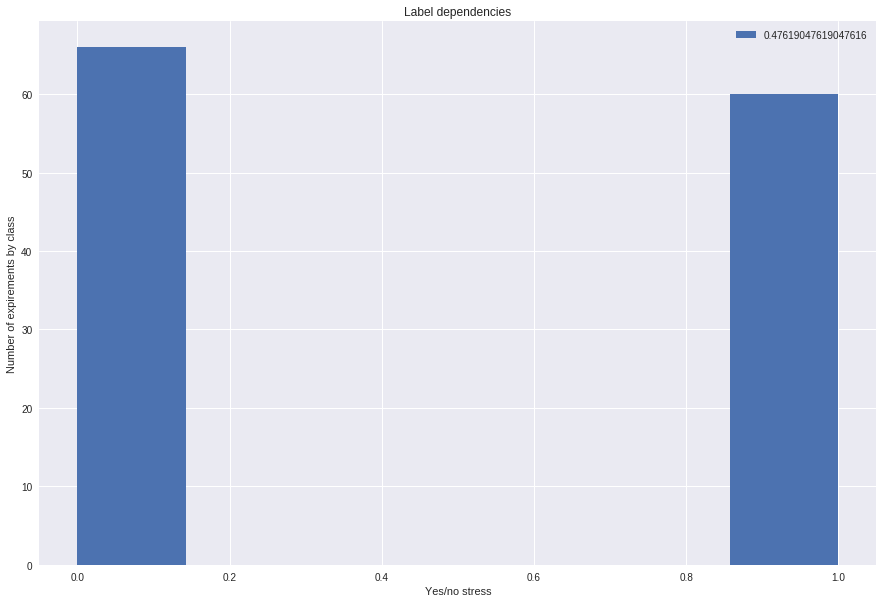

In [211]:
y_new_4 = y_new/100
y_new_4
y_new_4 = pd.DataFrame(threshbin(0.64, y_new_4))
print(y_new_4[y_new_4==0].count())
print(y_new_4[y_new_4==1].count())

plt.figure(figsize=(15,10))
plt.hist(y_new_4.values, bins = 7); #We added 7 bins to clearly see that there are only 0 and 1 labels. 
plt.title('Label dependencies')
plt.xlabel('Yes/no stress')
plt.ylabel('Number of expirements by class')
plt.legend(y_new_4.mean())

Result: there is evident stress level distribution 

### Let's divide experiments for 4 classes and look stress level destibution in dataset 

In [0]:
y_new_multi = y_new.copy()

for i in range(0, y_new_multi.shape[0]):
  if (y_new_multi[i]<=25):
    y_new_multi[i] = 0
  elif(y_new_multi[i]<=50): 
    y_new_multi[i] = 1
  elif(y_new_multi[i]<=75): 
    y_new_multi[i] = 2
  else:
    y_new_multi[i]=3

In [207]:
from sklearn.preprocessing import MultiLabelBinarizer
mlb = MultiLabelBinarizer()
y_new_multi_4 = (mlb.fit_transform(y_new_multi))
y_new_multi_4

array([[0, 0, 0, 1],
       [0, 0, 0, 1],
       [0, 0, 0, 1],
       [0, 0, 0, 1],
       [0, 0, 0, 1],
       [0, 0, 0, 1],
       [0, 0, 0, 1],
       [0, 0, 0, 1],
       [0, 0, 0, 1],
       [0, 0, 0, 1],
       [0, 0, 0, 1],
       [0, 0, 0, 1],
       [0, 0, 0, 1],
       [0, 0, 0, 1],
       [0, 0, 0, 1],
       [0, 0, 0, 1],
       [0, 0, 0, 1],
       [0, 0, 0, 1],
       [0, 0, 0, 1],
       [0, 0, 0, 1],
       [0, 0, 0, 1],
       [0, 0, 0, 1],
       [0, 0, 0, 1],
       [0, 0, 0, 1],
       [0, 0, 1, 0],
       [0, 0, 1, 0],
       [0, 0, 1, 0],
       [0, 0, 1, 0],
       [0, 0, 1, 0],
       [0, 0, 1, 0],
       [0, 0, 1, 0],
       [0, 0, 1, 0],
       [0, 0, 1, 0],
       [0, 0, 1, 0],
       [0, 0, 1, 0],
       [0, 0, 1, 0],
       [0, 0, 0, 1],
       [0, 0, 0, 1],
       [0, 0, 0, 1],
       [0, 0, 0, 1],
       [0, 0, 0, 1],
       [0, 0, 0, 1],
       [0, 0, 0, 1],
       [0, 0, 0, 1],
       [0, 0, 0, 1],
       [0, 0, 0, 1],
       [0, 0, 0, 1],
       [0, 0,

Text(0,0.5,'Number of expirements by class')

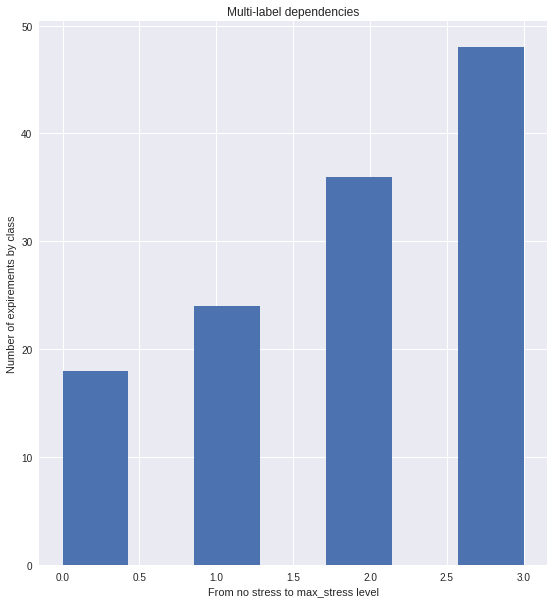

In [213]:
plt.figure(figsize=(20,10))
plt.subplot(1,2,2)
plt.hist(y_new_multi, bins = 7); #We added 7 bins to clearly see that there are only 0 and 1 labels. 
plt.title('Multi-label dependencies')
plt.xlabel('From no stress to max_stress level')
plt.ylabel('Number of expirements by class')

Result: there is evident stress level distribution 

# Visualization

### Visualization of two conditions.

Data without using normalisation. 
1.   'Rost' is  normal  person condition dataset
2.   'Rost2' is stress person condition datase for the same person 



/usr/local/lib/python3.6/dist-packages/pandas/plotting/_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


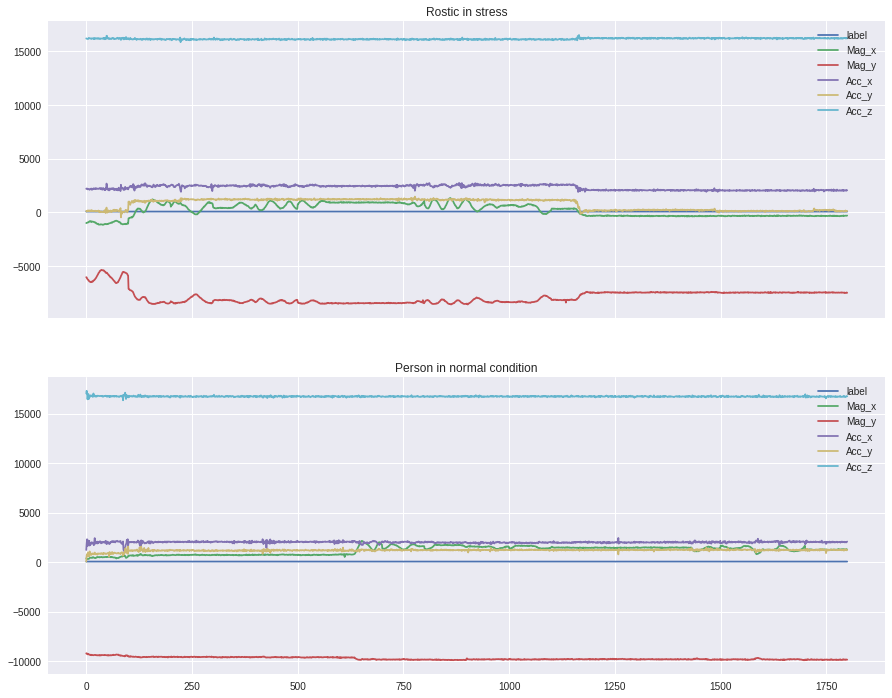

In [215]:
 _, ax = plt.subplots(2, sharex=True, figsize=(15,12))
  

df[df.people_id == 'Rost2'].plot(ax=ax[0], title='Rostic in stress',
                            x=np.array(range(df[df.people_id == 'Rost2'].shape[0])),
                            y=df.columns.drop('Mag_z', 'label'))
df[df.people_id == 'Rost'].plot(ax=ax[1], title='Person in normal condition', 
                          x=np.array(range(df[df.people_id == 'Rost'].shape[0])),
                          y=df.columns.drop('Mag_z', 'label'))

Result: Two different types of condition are clearly detected by splashs in stress condition.

### Visualization of  four conditions.

Data with using normalisation.  





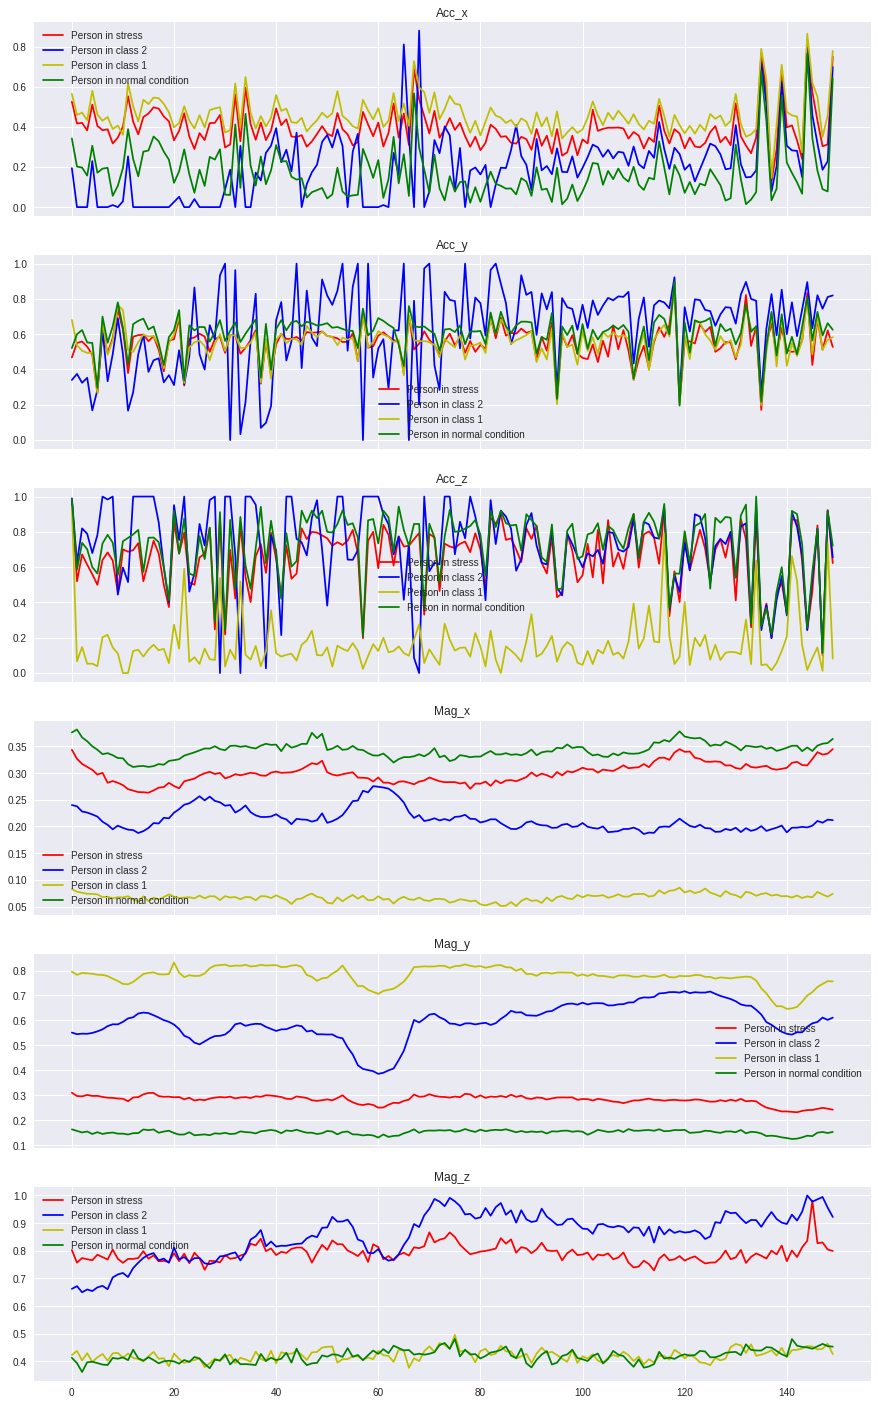

In [39]:

_, axs = plt.subplots(6, sharex=True, figsize=(15,25))
labels = ['Acc_x', 'Acc_y', 'Acc_z', 'Mag_x', 'Mag_y', 'Mag_z']
arr_nervous = X_ass_norm.values[np.where(y_new_multi == 3)[0][0]]
arr_class2 = X_ass_norm.values[np.where(y_new_multi == 2)[0][0]]
arr_class1 = X_ass_norm.values[np.where(y_new_multi == 1)[0][0]]
arr_patient = X_ass_norm.values[np.where(y_new_multi == 0)[0][0]]

for i in range(axs.shape[0]):
  axs[i].plot(arr_nervous[np.array(range(num_timestamp * i, num_timestamp * (i + 1)))], "r-", label='Person in stress')
  axs[i].plot(arr_class2[np.array(range(num_timestamp * i, num_timestamp * (i + 1)))], "b-", label='Person in class 2')
  axs[i].plot(arr_class1[np.array(range(num_timestamp * i, num_timestamp * (i + 1)))],"y-", label='Person in class 1')
  axs[i].plot(arr_patient[np.array(range(num_timestamp * i, num_timestamp * (i + 1)))], "g-", label='Person in normal condition')
  axs[i].set_title(labels[i])
  
  axs[i].legend()
  

Result: Different human behavior patterns are detected.  Data from the magnetometer is more useful for this determination. 



### Visualisation of data relations

In [216]:
data_assembled = df.copy()
data_assembled.label[(data_assembled.label>= 0) & (data_assembled.label <= 25)] = 0
data_assembled.label[(data_assembled.label> 25) & (data_assembled.label <= 50)] = 1
data_assembled.label[(data_assembled.label> 50) & (data_assembled.label <= 75)] = 2
data_assembled.label[(data_assembled.label> 75) & (data_assembled.label <= 100)] = 3

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ip

In [217]:
data_assembled.columns

Index(['label', 'people_id', 'Mag_x', 'Mag_y', 'Mag_z', 'Acc_x', 'Acc_y',
       'Acc_z'],
      dtype='object')

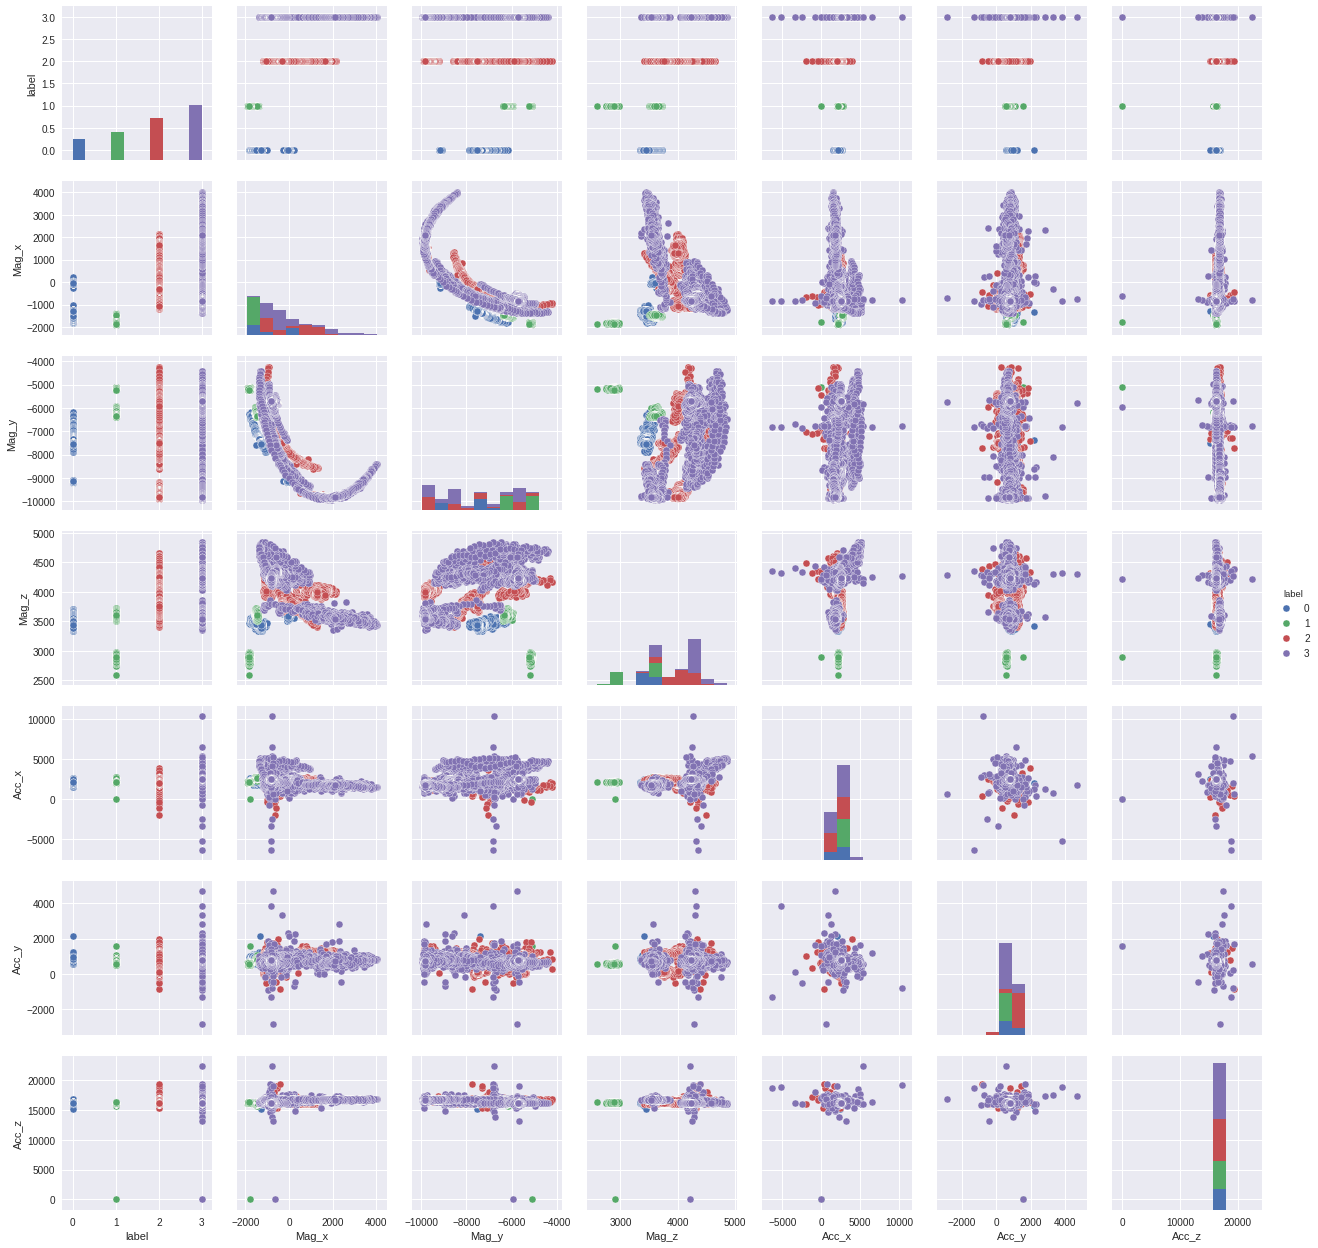

In [218]:

sns.pairplot(data_assembled.drop(["people_id"]), hue='label')


Как видно из графика, разброс параметров минимальный. 2 разных X имеют одинаковое поведение. Для людей, которые сильно волнуются. 



Сранить пустой стул и непустой стул 

какой то резалт

In [0]:
def plot_measurements_scatter(
    df2analyse,
    means_stds=None,
    sensors_list=['Mag', 'Acc'],
    coords_list = [['x', 'y'], ['x', 'z'], ['y', 'z']],
    n_stds = 5
):    
    fig, ax = plt.subplots(len(sensors_list), len(coords_list))
    fig.set_figheight(10)
    fig.set_figwidth(20)

    for n_row, sensor_type in enumerate(sensors_list):
        for n_col, coord_names in enumerate(coords_list):
            coord_name_1 = sensor_type + '_' + coord_names[0]
            coord_name_2 = sensor_type + '_' + coord_names[1]

            first_coord_data = df2analyse[coord_name_1].values
            second_coord_data = df2analyse[coord_name_2].values

            ax[n_row, n_col].scatter(first_coord_data, second_coord_data, alpha=0.2, s=7)
            if means_stds is not None:
              errors_ellipse = Ellipse(
                  xy=means_stds.loc[[coord_name_1, coord_name_2], 'mean'].values,
                  width=n_stds*means_stds.loc[coord_name_1, 'std'],
                  height=n_stds*means_stds.loc[coord_name_2, 'std'],
                  alpha=0.3,
                  color='green',
              )
              ax[n_row, n_col].add_artist(errors_ellipse)
            
            title = sensor_type + ' ' + ', '.join(coord_names)
            ax[n_row, n_col].set_title(title)

### Visualisation of data distribution

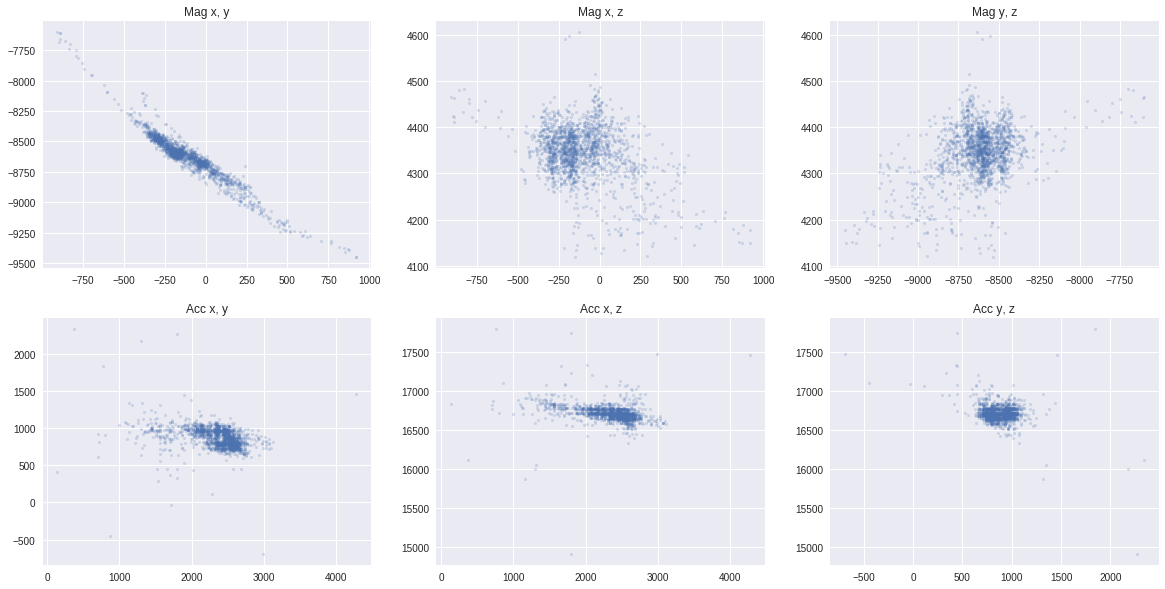

In [220]:
mask = (df.label == 100)# & (df_2['label'] == 'work, talking, tired, angry')
df2analyse = df.loc[mask, :]

plot_measurements_scatter(df2analyse)

# Classifier

Parameters definations:


*   X_ass_norm- normalized data without new features
*   X _assembled - non normalized data without new features
*   X_ass_add - non normalized data with new feature
*   X_ass_add_norm - normalized data with new features



In [0]:

from sklearn.model_selection import cross_val_score, cross_val_predict, KFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
import warnings
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore', category=DataConversionWarning) #to ignore not important warnings

In [0]:
def validation_mine(clf, X, y, print_F = True, return_pred = False, cv=None):
    if cv is None:
      kfold = KFold(n_splits=5, shuffle=True, random_state=24) # 5-fold CV
      cv = kfold.split(X, y) #  make the split
    scores = cross_val_score(clf, X, y, scoring='accuracy', cv=cv)
    y_pred = cross_val_predict(clf, X, y)
    if print_F:
        print('KFold score: {0:.3f} ± {1:.3f}'.format(scores.mean(), scores.std()) )
        print(classification_report(y, y_pred))
    if return_pred:
        return scores, y_pred
    else:
        return scores

In [0]:
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import LeavePGroupsOut

def custom_cross_validate(clf, X, y, print_F = True, return_pred = False, cv=None):
  if cv is None:
      kfold = KFold(n_splits=5, shuffle=True, random_state=24) # 5-fold CV
      cv = kfold.split(X, y) #  make the split
  scoring = ['accuracy', 'f1', 'precision', 'recall']
  scores = cross_validate(clf, X, y, scoring=scoring, cv=cv)
  y_pred = cross_val_predict(clf, X, y)
  if print_F:
      print('KFold score: {0:.3f} ± {1:.3f}'.format(scores.mean(), scores.std()) )
      print(classification_report(y, y_pred))
  if return_pred:
      return scores, y_pred
  else:
      return scores
  

In [210]:
print(custom_cross_validate(LogisticRegression(), X_ass_norm, y_new_4, print_F=False))

{'fit_time': array([0.0264864 , 0.02594328, 0.02644038, 0.02471876, 0.03051972]), 'score_time': array([0.00338459, 0.00380111, 0.0032382 , 0.00349879, 0.00321007]), 'test_accuracy': array([0.92307692, 1.        , 0.8       , 0.96      , 1.        ]), 'train_accuracy': array([0.97      , 0.98019802, 0.98019802, 0.97029703, 0.96039604]), 'test_f1': array([0.9       , 1.        , 0.7826087 , 0.95652174, 1.        ]), 'train_f1': array([0.97087379, 0.97959184, 0.98      , 0.97029703, 0.95652174]), 'test_precision': array([0.9       , 1.        , 0.75      , 0.91666667, 1.        ]), 'train_precision': array([0.94339623, 0.96      , 0.96078431, 0.94230769, 0.91666667]), 'test_recall': array([0.9       , 1.        , 0.81818182, 1.        , 1.        ]), 'train_recall': array([1., 1., 1., 1., 1.])}


### Using  generated features for classification


In [0]:
X_ass_add_norm =minmax_scale(X_ass_add, copy=True, feature_range=(0, 1))

In [230]:
print(validation_mine(LogisticRegression(), X_ass_norm, y_new_4))
print(validation_mine(LogisticRegression(), X_ass_add, y_new_4))
print(validation_mine(LogisticRegression(), df_features, y_new_4))
print(validation_mine(LogisticRegression(), X_assembled, y_new_4))
print(validation_mine(LogisticRegression(), X_ass_add_norm, y_new_4))

KFold score: 0.937 ± 0.074
             precision    recall  f1-score   support

        0.0       0.60      0.64      0.62        66
        1.0       0.57      0.53      0.55        60

avg / total       0.59      0.59      0.59       126

[0.92307692 1.         0.8        0.96       1.        ]
KFold score: 0.865 ± 0.069
             precision    recall  f1-score   support

        0.0       0.64      0.82      0.72        66
        1.0       0.71      0.50      0.59        60

avg / total       0.68      0.67      0.66       126

[0.84615385 0.96       0.84       0.92       0.76      ]
KFold score: 0.722 ± 0.036
             precision    recall  f1-score   support

        0.0       0.70      0.70      0.70        66
        1.0       0.67      0.67      0.67        60

avg / total       0.68      0.68      0.68       126

[0.73076923 0.68       0.76       0.76       0.68      ]
KFold score: 0.865 ± 0.069
             precision    recall  f1-score   support

        0.0       0.67

Result: New features work not very good. 
вывод: фичи плохие
нормализация помогает
написали функцию кроссвалидации, попробовали затестили


### Using normalized data with new features



In [185]:
X_c = X_ass_add
y_new_clean
X_c = X_c.assign(Target =y_new_clean)
X_c =minmax_scale(X_c, copy=True, feature_range=(0, 1))

ValueError: ignored

In [186]:
from sklearn.model_selection import LeaveOneOut
loo = LeaveOneOut()
loo.get_n_splits(X_c)
print(loo)
def spl(X,y):
  for train_index, test_index in loo.split(X):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
  return X_train, X_test, y_train, y_test
X_train, X_test, y_train, y_test = spl(X_c, y_new_clean)

LeaveOneOut()
TRAIN: [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125] TEST: [0]


KeyError: ignored

In [0]:
from sklearn import datasets
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC
from sklearn.cross_validation import train_test_split
from sklearn.metrics import accuracy_score

In [246]:
X_train, X_test, y_train, y_test = train_test_split(X_ass_norm, y_new_4, test_size = 0.5, random_state =42)
clf = OneVsRestClassifier(LinearSVC(random_state=42)).fit(X_train, y_train)
y_predicted = clf.predict(X_train) 
print('Accuracy of train is {}'.format(accuracy_score(y_train, y_predicted)))
y_predicted = clf.predict(X_test) 
print('Accuracy of test is {}'.format(accuracy_score(y_test, y_predicted)))

Accuracy of train is 1.0
Accuracy of test is 0.9365079365079365


Выглялит круто, но это не корректно. Давайте все-таки реализуем Leave one out

In [112]:
indxs = np.array([])
np.concatenate([[1,2],[]])


array([1., 2.])

In [179]:
import random
import numpy as np 
def live_one_out(X,y,y_label, n_people=1, ifrand = False, shuffle=True):
  
  labels = (np.unique(y))
  
  indxs = None
  for i in range(n_people):
    a = random.randint(0, labels.shape[0] - 1)
    if indxs is not None:
      indxs = np.concatenate([np.where(y == labels[a])[0], indxs])
    else:
      indxs = np.where(y == labels[a])[0]
  y_test = np.zeros((indxs.shape[0] ,y_label.shape[1]))
  X_test = np.zeros((indxs.shape[0] ,X.shape[1]))

  for i in range(0, indxs.shape[0]):
    y_test[i, :] = y_label[indxs[i], :]
    X_test[i, :] = X[indxs[i], :]
  
    
  if shuffle:
    p = np.random.permutation(X_test.shape[0])
  else:
    p = np.array(range(X_test.shape[0]))
  X_test = X_test[p, :]; 
  y_test = y_test[p, :];
  
  mask = np.ones(len(X), dtype=bool)
  for i in range(0, X.shape[0]):
    for j in range(0, indxs.shape[0]):
      if i == indxs[j]:
        mask[i]= 0
  X_train = np.array((X[mask,...]))
  for i in range(0, y.shape[0]):
    for j in range(0, indxs.shape[0]):
      if i == indxs[j]:
        mask[i]= 0
  y_train = np.array((y_label[mask,...]))
  
  if shuffle:
    p = np.random.permutation(X_train.shape[0])
  else:
    p = np.array(range(X_train.shape[0]))
  X_train = X_train[p, :]; 
  y_train = y_train[p, :];
  return y_test, X_test, X_train, y_train

y_test, X_test, X_train, y_train = live_one_out(X_ass_add_norm, y_new_clean, y_new_4.values, shuffle=True, n_people=1)
print(X_train.shape)
print(X_test.shape)
print(y_test.shape)
print(y_train.shape)

(114, 900)
(12, 900)
(12, 1)
(114, 1)


In [178]:

y_new_multi_4.shape[1]

4

In [180]:
for i in range(5):
  y_test, X_test, X_train, y_train = live_one_out(X_ass_add_norm, y_new_clean,y_new_multi_4, n_people=1, shuffle=True)
  clf = OneVsRestClassifier(LinearSVC(random_state=42)).fit(X_train, y_train)
  y_predicted = clf.predict(X_train) 
  print('Accuracy of train is {}'.format(accuracy_score(y_train, y_predicted)))
  y_predicted = clf.predict(X_test) 
  print('Accuracy of test is {}'.format(accuracy_score(y_test, y_predicted)))

Accuracy of train is 0.9912280701754386
Accuracy of test is 0.0
Accuracy of train is 0.9824561403508771
Accuracy of test is 0.0
Accuracy of train is 1.0
Accuracy of test is 0.0
Accuracy of train is 1.0
Accuracy of test is 0.5
Accuracy of train is 1.0
Accuracy of test is 0.0


В некоторых ситуациях, получаем точность 0, а на некоторых значениях точность = 1. Это может говорить о том, что некоторые классы очень похожи друг на друга. 

In [181]:
for i in range(5):
  y_test, X_test, X_train, y_train = live_one_out(X_ass_add_norm, y_new_multi,y_new_multi, n_people=1, shuffle=True)
  clf = OneVsRestClassifier(LinearSVC(random_state=42)).fit(X_train, y_train)
  y_predicted = clf.predict(X_train) 
  print('Accuracy of train is {}'.format(accuracy_score(y_train, y_predicted)))
  y_predicted = clf.predict(X_test) 
  print('Accuracy of test is {}'.format(accuracy_score(y_test, y_predicted)))

Accuracy of train is 1.0
Accuracy of test is 0.0
Accuracy of train is 1.0
Accuracy of test is 0.0
Accuracy of train is 1.0
Accuracy of test is 0.0
Accuracy of train is 1.0
Accuracy of test is 0.0
Accuracy of train is 1.0
Accuracy of test is 0.0


In [217]:
y_train, y_predicted

(array([[0, 0, 0, 1],
        [0, 0, 0, 1],
        [0, 0, 0, 1],
        [0, 0, 0, 1],
        [0, 0, 0, 1],
        [0, 0, 0, 1],
        [0, 0, 0, 1],
        [0, 0, 0, 1],
        [0, 0, 0, 1],
        [0, 0, 0, 1],
        [0, 0, 0, 1],
        [0, 0, 0, 1],
        [0, 0, 0, 1],
        [0, 0, 0, 1],
        [0, 0, 0, 1],
        [0, 0, 0, 1],
        [0, 0, 0, 1],
        [0, 0, 0, 1],
        [0, 0, 0, 1],
        [0, 0, 0, 1],
        [0, 0, 0, 1],
        [0, 0, 0, 1],
        [0, 0, 0, 1],
        [0, 0, 1, 0],
        [0, 0, 1, 0],
        [0, 0, 1, 0],
        [0, 0, 1, 0],
        [0, 0, 1, 0],
        [0, 0, 1, 0],
        [0, 0, 1, 0],
        [0, 0, 1, 0],
        [0, 0, 1, 0],
        [0, 0, 1, 0],
        [0, 0, 1, 0],
        [0, 0, 1, 0],
        [0, 0, 0, 1],
        [0, 0, 0, 1],
        [0, 0, 0, 1],
        [0, 0, 0, 1],
        [0, 0, 0, 1],
        [0, 0, 0, 1],
        [0, 0, 0, 1],
        [0, 0, 0, 1],
        [0, 0, 0, 1],
        [0, 0, 0, 1],
        [0

In [219]:
from sklearn.model_selection import LeaveOneGroupOut
from sklearn.model_selection import LeaveOneOut

logo = LeaveOneOut()

uniq_columns = np.unique(y_new_clean)
groups = y_new_clean.copy()

acc_train = []
acc_test = []
for i in range(uniq_columns.shape[0]):
  groups[y_new_clean == uniq_columns[i]] = i
clf = OneVsRestClassifier(LinearSVC(random_state=42)).fit(X_train, y_train)

for train_index, test_index in logo.split(X_ass_add_norm, y_new_multi_4, groups):
  X_train, X_test = X_ass_add_norm[train_index], X_ass_add_norm[test_index]
  y_train, y_test = y_new_multi_4[train_index], y_new_multi_4[test_index]
  
  y_predicted = clf.predict(X_train) 
#  print('Accuracy of train is {}'.format(accuracy_score(y_train, y_predicted)))
  acc_train.append(accuracy_score(y_train, y_predicted))
  y_predicted = clf.predict(X_test) 
#  print('Accuracy of test is {}'.format(accuracy_score(y_test, y_predicted)))
  
  acc_test.append(accuracy_score(y_test, y_predicted))

print('Accuracy of train is {}+-{}'.format(np.mean(acc_train), np.std(acc_train)))
print('Accuracy of test is {}+-{}'.format(np.mean(acc_test), np.std(acc_test)))



Accuracy of train is 0.9682539682539684+-0.0014025855259920347
Accuracy of test is 0.9682539682539683+-0.17532319074900413


### Grid search

In [0]:
# build a classifier
from scipy.stats import randint as sp_randint
from time import time
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=36)

In [0]:
#Utility function to report best scores
def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")

def do_grid_search(X, y ,arr_clf, arr_params,n_iter_search = 20):
  # specify parameters and distributions to sample from
  for i in range(arr_clf.__len__()):
    param_dist = arr_params[i]
    clf = arr_clf[i]

    # run randomized search

    random_search = RandomizedSearchCV(clf, param_distributions=param_dist,
                                       n_iter=n_iter_search, cv=5)

    start = time()
    random_search.fit(X, y)
    print("RandomizedSearchCV took %.2f seconds for %d candidates"
          " parameter settings." % ((time() - start), n_iter_search))
    report(random_search.cv_results_)

In [241]:

do_grid_search(X_ass_add_norm, y_new_multi_4,[RandomForestClassifier(n_estimators=36)], 
               [{"max_depth": [3, None],
              "max_features": sp_randint(1, 11),
              "min_samples_split": sp_randint(2, 11),
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}])


RandomizedSearchCV took 7.05 seconds for 20 candidates parameter settings.
Model with rank: 1
Mean validation score: 0.508 (std: 0.258)
Parameters: {'bootstrap': False, 'criterion': 'gini', 'max_depth': None, 'max_features': 10, 'min_samples_split': 3}

Model with rank: 2
Mean validation score: 0.492 (std: 0.273)
Parameters: {'bootstrap': False, 'criterion': 'gini', 'max_depth': None, 'max_features': 7, 'min_samples_split': 4}

Model with rank: 3
Mean validation score: 0.476 (std: 0.239)
Parameters: {'bootstrap': False, 'criterion': 'gini', 'max_depth': 3, 'max_features': 9, 'min_samples_split': 4}



The best parameters for RandomForestClassifier are bootstrap: False, criterion: entropy, max_depth: None, max_features: 9, min_samples_split: 6

In [0]:
import sklearn.metrics
from itertools import cycle
from sklearn import svm
from sklearn import metrics
from sklearn.metrics import roc_curve, auc, confusion_matrix
from scipy import interp
from sklearn.model_selection import GridSearchCV

def roc_curve_m(X, y, printF = True, returnF = False):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5, random_state =42)
    clf = OneVsRestClassifier(LogisticRegression()).fit(X_train, y_train)
    probs = clf.predict_proba(X_test) 
    y_predicted = clf.predict(X_test)
    preds = probs[:,1]
    fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
    roc_auc = metrics.auc(fpr, tpr)
    
    if (printF):
        print('Accuracy of test is {}'.format(accuracy_score(y_test, y_predicted)))
        print(classification_report(y_test, y_predicted))
        print(confusion_matrix(y_test, y_predicted))
    if (returnF):
        score = accuracy_score(y_test, y_predicted)
        return fpr, tpr, roc_auc, score
      

Text(0.5,0,'False Positive Rate')

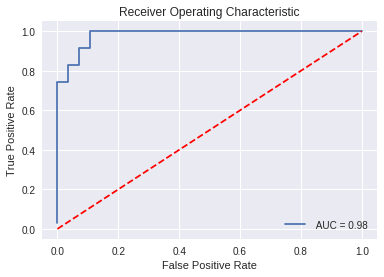

In [243]:

fpr, tpr, roc_auc, score = roc_curve_m(X_ass_add_norm, y_new_4, returnF=True, printF=False)
plt.plot(fpr, tpr, label = ' '+'AUC = %0.2f' % roc_auc)

plt.legend(loc = 'lower right')
plt.title('Receiver Operating Characteristic')
plt.plot([0, 1], [0, 1],'r--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

We can see in this graph that we obtain a very good ROC curve.  

Text(0.5,0,'False Positive Rate')

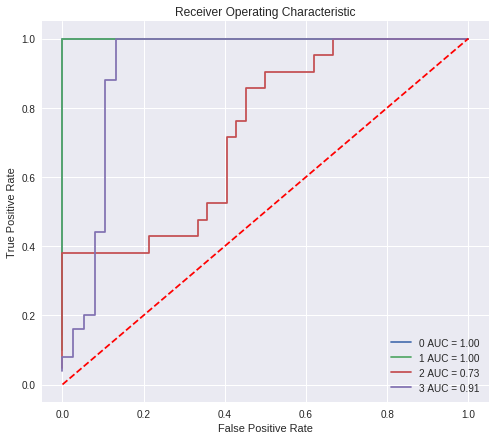

In [95]:
fig, ax = plt.subplots(figsize = (8,7))
scores = []
AUC = [] 
for i in range(0, y_new_multi_4.shape[1]):
    fpr, tpr, roc_auc, score = roc_curve_m(X_ass_add_norm, y_new_multi_4[:,i], returnF=True, printF=False)
    scores.append(score)
    AUC.append(roc_auc)
    plt.plot(fpr, tpr, label = str(i)+' '+'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.title('Receiver Operating Characteristic')
plt.plot([0, 1], [0, 1],'r--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

# Conclusion
In this work we have applyed the following rules:
1. Described the data mining and described. We decided that this model is a part of (Временного ряда). In this model, we should analyse the chain of data
2. Loaded the data using pandas and prepeared our dataset to 
3. Did normalization and selected new feauters. This step was neccessary to avoid some noise and our signals is not caomparable because they have differents Energy (mean value). Also We applyed   some simple approcah in order to improve our results.